## READ ME

Name: Kim, Minjun

Student ID: 20195024

Instructions: Please run the cells one by one. This is because some variables used in the previous cell are also used in the later cell.

***
***
### **Q5**

In [93]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

***
#### Q5(a) 

In [7]:
Auto=load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
#to check if there are nan values
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [38]:
#Set 1 for cars with gas mileage above the median, and 0 for cars with gas mileage below the median

median_mpg=Auto['mpg'].median()
print(f"Median of gas mileage is {median_mpg}")
Auto['binary'] = (Auto['mpg'] > median_mpg).astype(int)

Median of gas mileage is 22.75


Text(0.5, 1.0, 'weight vs mpg')

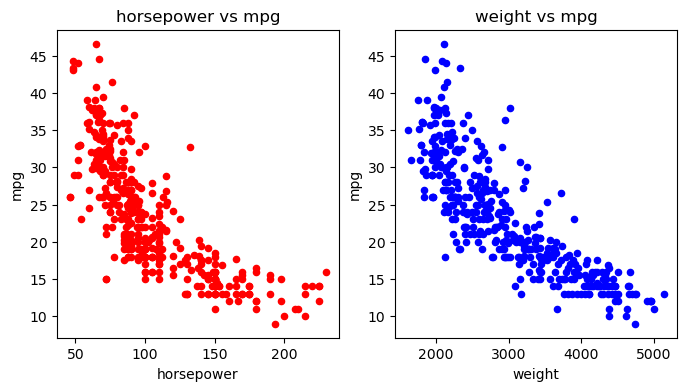

In [39]:
fig, axes=plt.subplots(ncols=2, figsize=(8, 4))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[0],color='red')
Auto.plot.scatter('weight', 'mpg', ax=axes[1], color='blue')
axes[0].set_title("horsepower vs mpg")
axes[1].set_title("weight vs mpg")

Text(0.5, 1.0, 'weight vs binary')

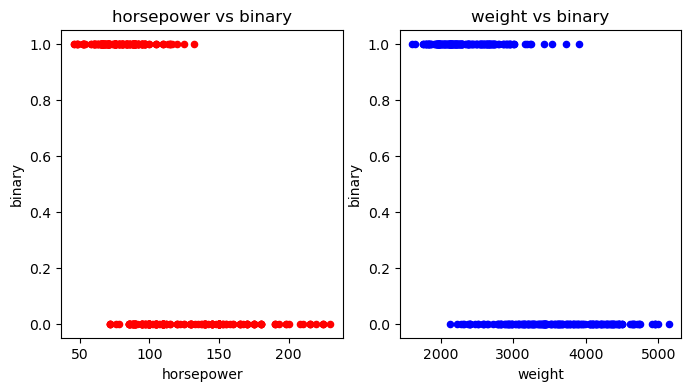

In [34]:
fig, axes=plt.subplots(ncols=2, figsize=(8, 4))
Auto.plot.scatter('horsepower', 'binary', ax=axes[0],color='red')
Auto.plot.scatter('weight', 'binary', ax=axes[1], color='blue')
axes[0].set_title("horsepower vs binary")
axes[1].set_title("weight vs binary")

Through this, I decided to set X1 as horsepower and X2 as weight in SVM classifier graph, because they seem to have a linear relationship with mpg.

I thought the SVM classifier would work well.

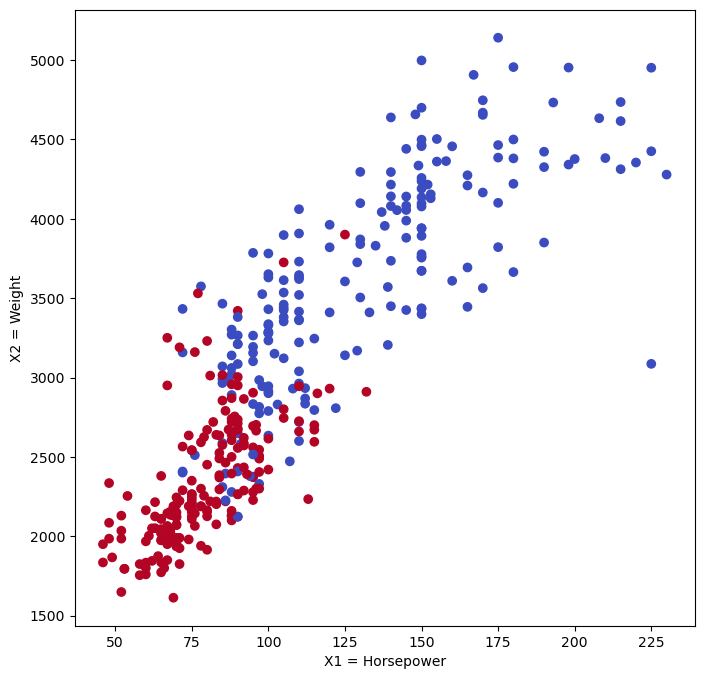

In [84]:
#Make SVM classifier plots

X=Auto[['horsepower', 'weight']].to_numpy()
y=Auto['binary'].to_numpy()

fig, ax=plt.subplots(figsize=(8,8))
scatter=ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.xlabel('X1 = Horsepower')
plt.ylabel('X2 = Weight')
plt.show()

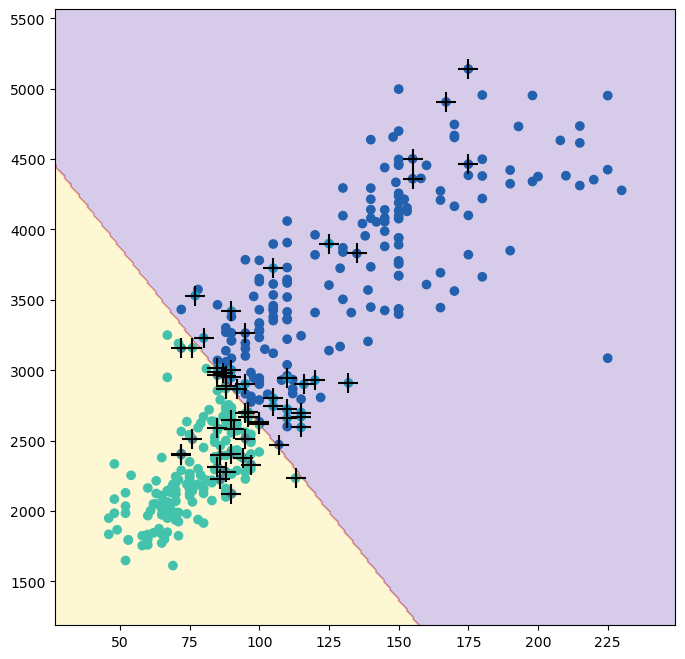

In [90]:
#cost parameter = 10
svm_linear=SVC(C=10, kernel='linear')
svm_linear.fit(X, y)
fig, ax=subplots(figsize=(8,8))
plot_svm(X, y, svm_linear, ax=ax)

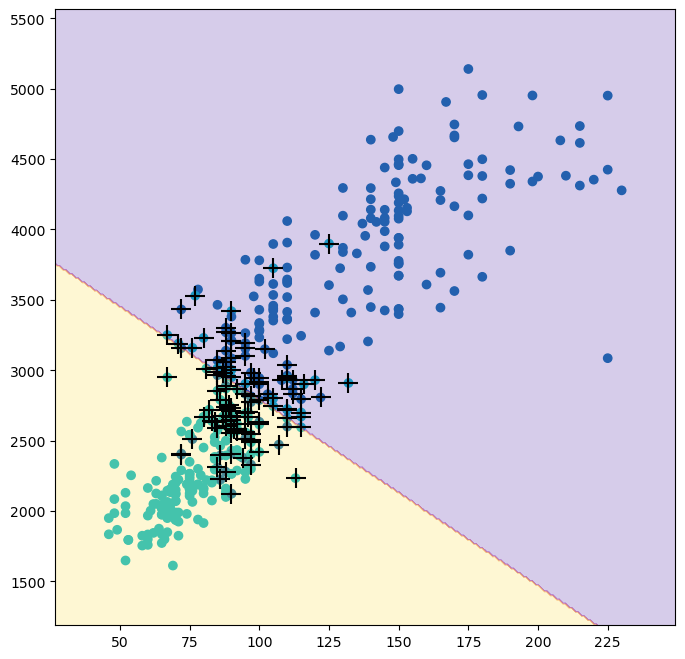

In [91]:
#cost parameter=0.1
svm_linear=SVC(C=0.1, kernel='linear')
svm_linear.fit(X, y)
fig, ax=subplots(figsize=(8,8))
plot_svm(X, y, svm_linear, ax=ax)

A lower cost parameter results in an increased number of support vectors due to the expansion of the margin.

In [133]:
cost_values=[0.001, 0.01, 0.1, 1, 5, 10, 100]

kfold=skm.KFold(5, random_state=0, shuffle=True)
grid=skm.GridSearchCV(svm_linear, {'C':cost_values}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
scores=grid.cv_results_[('mean_test_score')]

In [110]:
for i, cost in enumerate(cost_values):
    print(f"Cost parameter = {cost} : Cross-validation accuracy = {scores[i]:.4f}")


optimal_index = np.argmax(scores)
best_cost = cost_values[optimal_index]
print(f"\nOptimal cost parameter : {best_cost}")

Cost parameter = 0.001 : Cross-validation accuracy = 0.8726
Cost parameter = 0.01 : Cross-validation accuracy = 0.8751
Cost parameter = 0.1 : Cross-validation accuracy = 0.8751
Cost parameter = 1 : Cross-validation accuracy = 0.8751
Cost parameter = 5 : Cross-validation accuracy = 0.8929
Cost parameter = 10 : Cross-validation accuracy = 0.8853
Cost parameter = 100 : Cross-validation accuracy = 0.8802

Optimal cost parameter : 5


***
#### Q5(b)

In this problem, I want to use SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C.

In [162]:
X=Auto[['horsepower', 'weight']].to_numpy()
y=Auto['binary'].to_numpy()

In [163]:
#radial basis kernal
cost_values=[0.001, 0.01, 0.1, 1, 5, 10, 100]
gamma_values=[0.5, 1, 2, 3, 4]

svm_radial=SVC(kernel="rbf")
kfold=skm.KFold(5, random_state=0, shuffle=True)
grid=skm.GridSearchCV(svm_radial, {'C':cost_values, 'gamma':gamma_values}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
scores=grid.cv_results_[('mean_test_score')]

print(f"Optimal cost parameter and gamma value : {grid.best_params_}")
print(f"Best Cross-validation Accuracy : {grid.best_score_:.4f}")

Optimal cost parameter and gamma value : {'C': 5, 'gamma': 0.5}
Best Cross-validation Accuracy : 0.5125


In [164]:
for i, cost in enumerate(cost_values):
    for j, gamma in enumerate(gamma_values):
        score_index = i * len(gamma_values) + j
        print(f"Cost = {cost}, Gamma = {gamma}: Cross-validation accuracy = {scores[score_index]:.4f}")

Cost = 0.001, Gamma = 0.5: Cross-validation accuracy = 0.4311
Cost = 0.001, Gamma = 1: Cross-validation accuracy = 0.4311
Cost = 0.001, Gamma = 2: Cross-validation accuracy = 0.4311
Cost = 0.001, Gamma = 3: Cross-validation accuracy = 0.4311
Cost = 0.001, Gamma = 4: Cross-validation accuracy = 0.4311
Cost = 0.01, Gamma = 0.5: Cross-validation accuracy = 0.4311
Cost = 0.01, Gamma = 1: Cross-validation accuracy = 0.4311
Cost = 0.01, Gamma = 2: Cross-validation accuracy = 0.4311
Cost = 0.01, Gamma = 3: Cross-validation accuracy = 0.4311
Cost = 0.01, Gamma = 4: Cross-validation accuracy = 0.4311
Cost = 0.1, Gamma = 0.5: Cross-validation accuracy = 0.4311
Cost = 0.1, Gamma = 1: Cross-validation accuracy = 0.4311
Cost = 0.1, Gamma = 2: Cross-validation accuracy = 0.4311
Cost = 0.1, Gamma = 3: Cross-validation accuracy = 0.4311
Cost = 0.1, Gamma = 4: Cross-validation accuracy = 0.4311
Cost = 1, Gamma = 0.5: Cross-validation accuracy = 0.5100
Cost = 1, Gamma = 1: Cross-validation accuracy = 0.

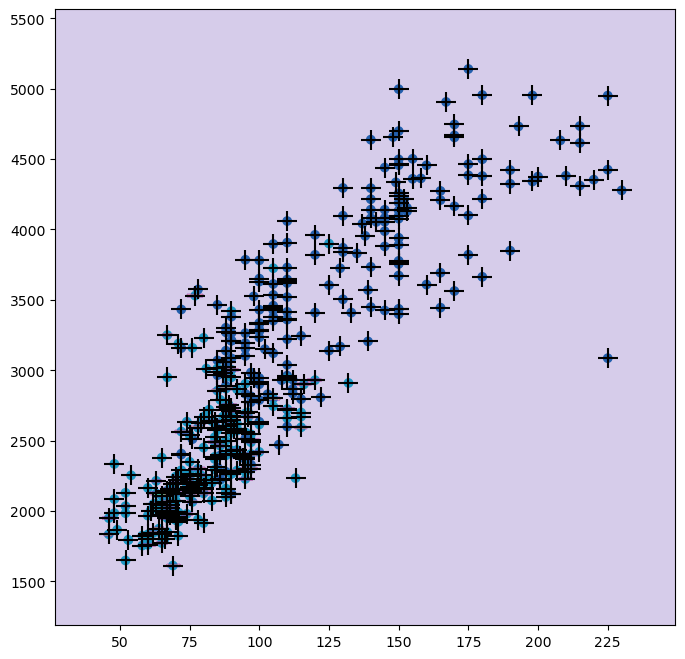

In [155]:
#This performs much worse than the linear SVM in problem(a), because the data is not gathered in a circle.

svm_radial=SVC(kernel="rbf", gamma=0.5 ,C=5)
svm_radial.fit(X,y)
fig, ax=subplots(figsize=(8,8))
plot_svm(X, y, svm_radial, ax=ax)

In [165]:
#polynomial basis kernal
cost_values=[0.001, 0.01, 0.1, 1, 5, 10, 100]
degree_values=[2, 3, 4, 5]

svm_polynomial=SVC(kernel="poly")
kfold=skm.KFold(5, random_state=0, shuffle=True)
grid=skm.GridSearchCV(svm_polynomial, {'C':cost_values, 'degree':degree_values}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
scores=grid.cv_results_[('mean_test_score')]

print(f"Optimal cost parameter and gamma value : {grid.best_params_}")
print(f"Best Cross-validation Accuracy : {grid.best_score_:.4f}")

Optimal cost parameter and gamma value : {'C': 100, 'degree': 4}
Best Cross-validation Accuracy : 0.8853


In [166]:
for i, cost in enumerate(cost_values):
    for j, degree in enumerate(degree_values):
        score_index = i * len(degree_values) + j
        print(f"Cost = {cost}, Degree = {degree}: Cross-validation accuracy = {scores[score_index]:.4f}")

Cost = 0.001, Degree = 2: Cross-validation accuracy = 0.4695
Cost = 0.001, Degree = 3: Cross-validation accuracy = 0.7575
Cost = 0.001, Degree = 4: Cross-validation accuracy = 0.8264
Cost = 0.001, Degree = 5: Cross-validation accuracy = 0.8494
Cost = 0.01, Degree = 2: Cross-validation accuracy = 0.8468
Cost = 0.01, Degree = 3: Cross-validation accuracy = 0.8673
Cost = 0.01, Degree = 4: Cross-validation accuracy = 0.8724
Cost = 0.01, Degree = 5: Cross-validation accuracy = 0.8674
Cost = 0.1, Degree = 2: Cross-validation accuracy = 0.8726
Cost = 0.1, Degree = 3: Cross-validation accuracy = 0.8726
Cost = 0.1, Degree = 4: Cross-validation accuracy = 0.8751
Cost = 0.1, Degree = 5: Cross-validation accuracy = 0.8700
Cost = 1, Degree = 2: Cross-validation accuracy = 0.8803
Cost = 1, Degree = 3: Cross-validation accuracy = 0.8700
Cost = 1, Degree = 4: Cross-validation accuracy = 0.8751
Cost = 1, Degree = 5: Cross-validation accuracy = 0.8725
Cost = 5, Degree = 2: Cross-validation accuracy = 0.

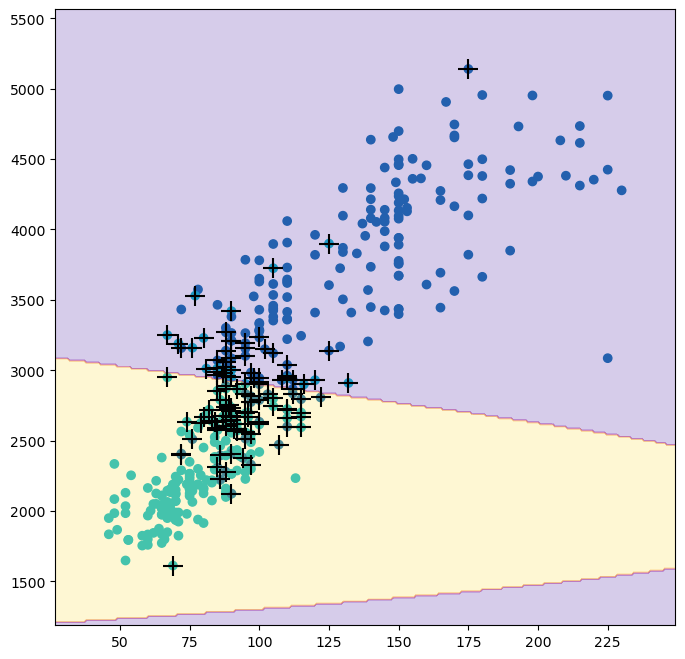

In [160]:
#This performs a little worse than the linear SVM in problem(a), because the data are linearly listed.

svm_polynomial=SVC(kernel="rbf", C=100, degree=4)
svm_polynomial.fit(X,y)
fig, ax=subplots(figsize=(8,8))
plot_svm(X, y, svm_polynomial, ax=ax)

***
***
### **Q6**

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from lifelines import (KaplanMeierFitter, CoxPHFitter)
from lifelines.statistics import (logrank_test, multivariate_logrank_test)
from ISLP.survival import sim_time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

***
#### Q6(a)

In [65]:
BrainCancer = load_data('BrainCancer')
BrainCancer.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


The "±1 standard error band" is essentially similar to a 68% confidence interval. In a normal distribution, values within ±1 standard error of the estimate include approximately 68% of the total values.

<Axes: xlabel='timeline'>

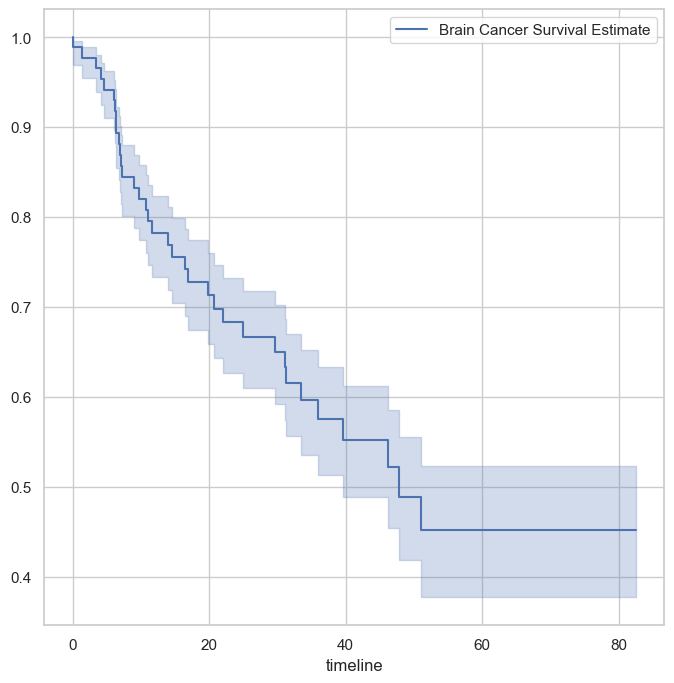

In [66]:
#Therefore I should set alpha=1-0.68=0.32

fig, ax = plt.subplots(figsize=(8, 8))
km = KaplanMeierFitter(alpha=0.32)
km_brain = km.fit(BrainCancer['time'],BrainCancer['status'])
km_brain.plot(label='Brain Cancer Survival Estimate',ax=ax)

In [67]:
#I calculated the standard error for Kaplan-Meier survival estimates at each time point
se = km.confidence_interval_.iloc[:, 1] - km.survival_function_.iloc[:, 0]
se

0.00     0.000000
0.07     0.007145
1.18     0.007145
1.41     0.011478
1.54     0.011478
           ...   
65.02    0.071286
67.38    0.071286
73.74    0.071286
78.75    0.071286
82.56    0.071286
Length: 87, dtype: float64

***
#### Q6(b)

In [68]:
#There are 86 unique timepoint in BrainCancer data set.
unique_timepoints=BrainCancer['time'].unique()
print(len(unique_timepoints))

86


In [69]:
n=88 #size of each boostrap sample
B=200 #the number of repeating times
unique_timepoints = np.sort(unique_timepoints)  #sorting in ascending order

#I made an array to store Kaplan-Meier estimates for each bootstrap sample
km_estimates=np.zeros((B, len(unique_timepoints)))  

for i in range(B):
    #generate bootstrap sample
    bootstrap_indices=np.random.choice(range(n), size=n, replace=True)
    bootstrap_sample=BrainCancer.iloc[bootstrap_indices]

    km_bootstrap=KaplanMeierFitter()
    km_bootstrap.fit(bootstrap_sample['time'], bootstrap_sample['status'])

    #store survival estimates at each timepoint
    for j, timepoint in enumerate(unique_timepoints):
        if timepoint in km_bootstrap.survival_function_.index:
            km_estimates[i, j]=km_bootstrap.survival_function_.loc[timepoint]
        
        else:  #this is a case if timepoint is not in survival function
            km_estimates[i, j]=np.nan 

#calculate standard error at each timepoint
se_bootstrap=np.nanstd(km_estimates, axis=0)

for timepoint, error in zip(unique_timepoints, se_bootstrap):
    print(f"Timepoint: {timepoint}, SE: {error}")


Timepoint: 0.07, SE: 0.009998917282355668
Timepoint: 1.18, SE: 0.012406806263824163
Timepoint: 1.41, SE: 0.014752419270111379
Timepoint: 1.54, SE: 0.014782058839412315
Timepoint: 2.03, SE: 0.016035962403141785
Timepoint: 3.38, SE: 0.016637512870180865
Timepoint: 4.16, SE: 0.019843159581361118
Timepoint: 4.56, SE: 0.0231947545928519
Timepoint: 5.15, SE: 0.025049668738517925
Timepoint: 5.51, SE: 0.02343848843684536
Timepoint: 6.1, SE: 0.023429420492641025
Timepoint: 6.23, SE: 0.027466960158066454
Timepoint: 6.3, SE: 0.030298643663439526
Timepoint: 6.39, SE: 0.03018551617831925
Timepoint: 6.82, SE: 0.035716675278045874
Timepoint: 6.92, SE: 0.036195525714632096
Timepoint: 7.05, SE: 0.03380953607848081
Timepoint: 7.18, SE: 0.03867902323347183
Timepoint: 7.25, SE: 0.036617073430426
Timepoint: 8.98, SE: 0.041246676741802074
Timepoint: 9.77, SE: 0.037547013353003124
Timepoint: 10.1, SE: 0.03817820183013185
Timepoint: 10.49, SE: 0.03993096653586407
Timepoint: 10.82, SE: 0.040352826242166635
Tim

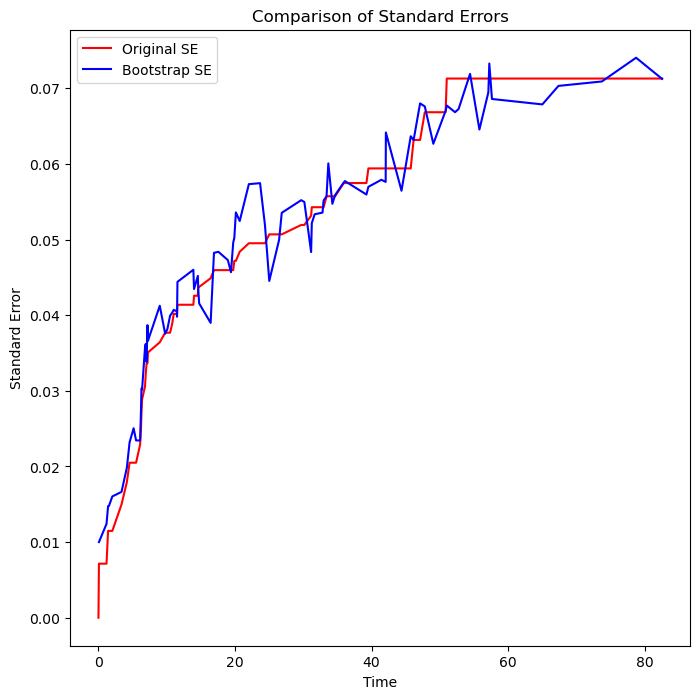

In [70]:
plt.figure(figsize=(8, 8))
plt.plot(km.survival_function_.index, se, label='Original SE', color='red')
plt.plot(unique_timepoints, se_bootstrap, label='Bootstrap SE', color='blue')

plt.xlabel('Time')
plt.ylabel('Standard Error')
plt.title('Comparison of Standard Errors')
plt.legend()
plt.show()

I could see there are similarities between the standard errors calculated using the original Kaplan-Meier method(se) and the bootstrap approach (se_bootsrap). This indicates that the bootstrap approach effectively captures the variability of the Kaplan-Meier estimates from the original dataset.

***
#### Q6(c)

In [64]:
#I found that there are some category type variables.
BrainCancer = load_data('BrainCancer')
BrainCancer.dtypes

sex          category
diagnosis    category
loc          category
ki              int64
gtv           float64
stereo       category
status          int64
time          float64
dtype: object

In [69]:
#I used ModelSpec and fit_transform, I could deal with categorical variables.
#And there are NaN values in diagnosis columns, so I dropped them.
processed_BrainCancer=BrainCancer.dropna()
model_df = MS(processed_BrainCancer.columns, intercept=False).fit_transform(processed_BrainCancer)
coxph = CoxPHFitter
cox_fit = coxph().fit(model_df,'time','status')
cox_fit.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
sex[Male],0.183748,0.360358,0.610119
diagnosis[LG glioma],-1.239530,0.579555,0.032455
diagnosis[Meningioma],-2.154566,0.450524,0.000002
diagnosis[Other],-1.268870,0.617672,0.039949
loc[Supratentorial],0.441195,0.703669,0.530665
ki,-0.054955,0.018314,0.002693
gtv,0.034293,0.022333,0.124661
stereo[SRT],0.177778,0.601578,0.767597


In [70]:
processed_BrainCancer['diagnosis'].unique()

['Meningioma', 'HG glioma', 'LG glioma', 'Other']
Categories (4, object): ['HG glioma', 'LG glioma', 'Meningioma', 'Other']

If we look at the table above, we see that the standard group is 'HG glinoma', because there are only diagnosis[LG glioma], diagnosis [Meningioma], and diagnosis[Other] in the table.


I focused on the results with a p-value less than 0.05.
Since the coefficient of diagnosis[Meningioma] is -2.154566, this indicates that patients diagnosed with Meningioma have a statistically significantly lower risk compared to the baseline diagnosis, the HG glioma.

Likewise, the coefficient of diagnosis[LG glioma] is -1.239530, so patients with LG glioma have a lower risk compared to the those with HG glioma.

Finally, ki, the Karnofsky index, of which the coefficient is -0.054955, is associated with a decrease in the risk.


***
#### Q6(d)

In [71]:
processed_BrainCancer['ki'].unique()

array([ 90,  70,  80, 100,  60,  40])

/var/folders/dk/r36f98650qqc2v_pgp1n5qs80000gn/T/ipykernel_31827/4075504638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_BrainCancer['ki_grouped'] = processed_BrainCancer['ki'].replace(40, 60)


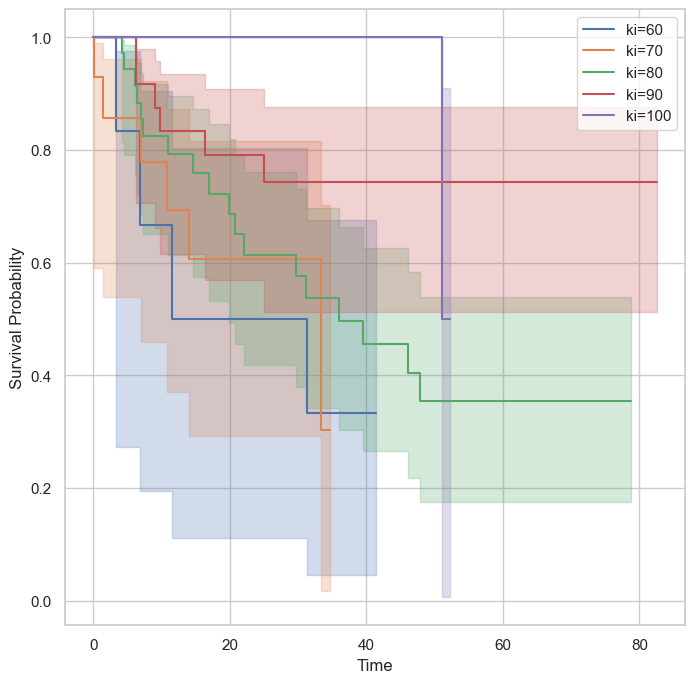

In [55]:
#Since there are only one obesevation has ki=40,, I group that together with ki=60
processed_BrainCancer['ki_grouped'] = processed_BrainCancer['ki'].replace(40, 60)

fig, ax = plt.subplots(figsize=(8, 8))
km = KaplanMeierFitter()

#I drew Kaplan-Meier curve for each kj group.
for ki, df in processed_BrainCancer.groupby('ki_grouped'):
    km.fit(df['time'], df['status'])
    km.plot(label=f'ki={ki}', ax=ax)

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

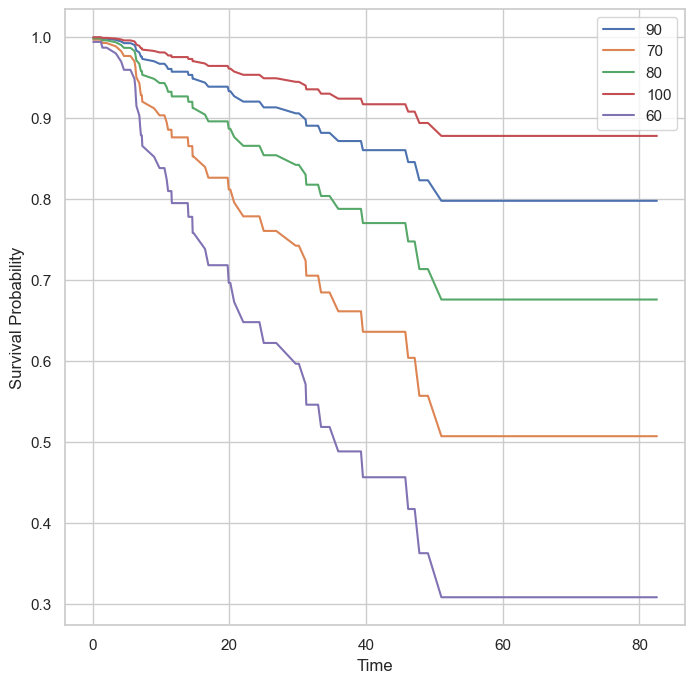

In [81]:
#I revised the survival curves using the Cox model to adjust for other predictors.

ki_levels=processed_BrainCancer['ki'].replace(40, 60).unique()
def representative(series):
    if hasattr(series.dtype, 'categories'):
        return pd.Series.mode(series) #최빈값
    else:
        return series.mean() #평균
representative_data = processed_BrainCancer.apply(representative, axis=0)

#I created a DataFrame with repeated rows of representative values for each 'ki' level.
model_df = pd.DataFrame([representative_data.iloc[0] for _ in range(len(ki_levels))])

#I assigned the 'ki' ki_levels to the new DataFrame.
model_df['ki'] = ki_levels 

model_spec = MS(processed_BrainCancer.columns, intercept=False)
transformed_df = model_spec.fit_transform(processed_BrainCancer)
ki_transformed_X = model_spec.transform(model_df)
ki_transformed_X.index = ki_levels
predicted_survival = cox_fit.predict_survival_function(ki_transformed_X)

fig, ax = subplots(figsize=(8, 8))
predicted_survival.plot(ax=ax)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()